<font color="green">**ARIMA model for generating long term forecast**</font>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import pandas_datareader as web

C:\Users\Pranav\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


**Get stock data and visualize**

In [2]:
#Get the stock quote 
df = web.DataReader('AMD', data_source='yahoo', start='2015-01-01', end='2020-11-24') 
#df = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2020-11-24') 
#df = web.DataReader('DIS', data_source='yahoo', start='2015-01-01', end='2020-11-24')
#df = web.DataReader('TSLA', data_source='yahoo', start='2015-01-01', end='2020-11-24') 
#Show the data 
df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,2.67,2.67,2.67,2.67,0,2.67
2015-01-05,2.70,2.64,2.67,2.66,8878200,2.66
2015-01-06,2.66,2.55,2.65,2.63,13912500,2.63
2015-01-07,2.65,2.54,2.63,2.58,12377600,2.58
2015-01-08,2.65,2.56,2.59,2.61,11136600,2.61


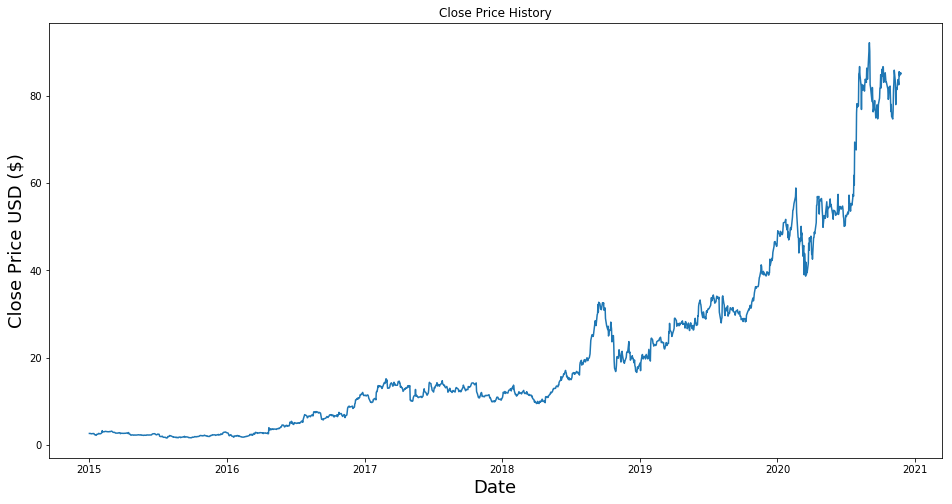

In [3]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

**Split the data set in train-test data**

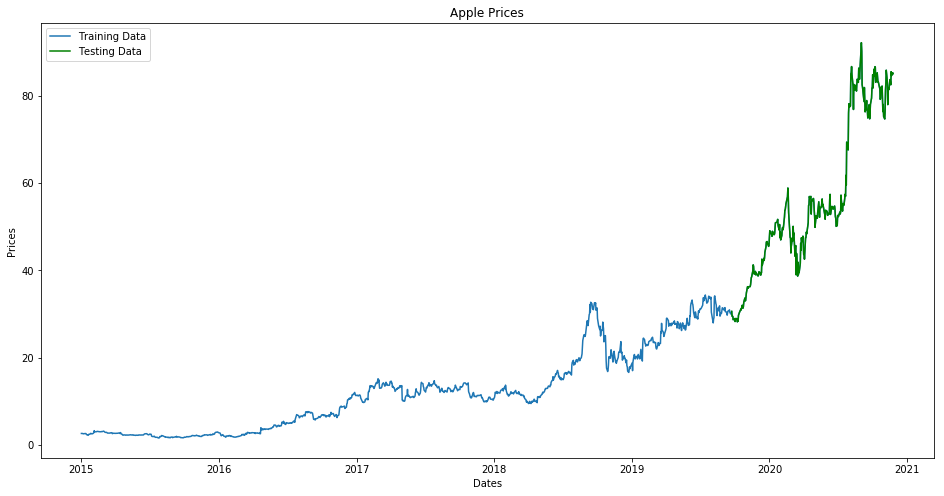

In [4]:
train_data, test_data = df[0:int(len(df)*0.8)], df[int(len(df)*0.8):]
plt.figure(figsize=(16,8))
plt.title('Apple Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(df['Close'], label='Training Data')
plt.plot(test_data['Close'], 'green', label='Testing Data')
#plt.xticks(np.arange(0,7982, 1300), df['Date'][0:7982:1300])
plt.legend()

In [5]:
train_data.head(-10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,2.670000,2.670000,2.670000,2.670000,0,2.670000
2015-01-05,2.700000,2.640000,2.670000,2.660000,8878200,2.660000
2015-01-06,2.660000,2.550000,2.650000,2.630000,13912500,2.630000
2015-01-07,2.650000,2.540000,2.630000,2.580000,12377600,2.580000
2015-01-08,2.650000,2.560000,2.590000,2.610000,11136600,2.610000
...,...,...,...,...,...,...
2019-08-30,31.870001,31.129999,31.600000,31.450001,40307000,31.450001
2019-09-03,31.139999,30.680000,30.830000,30.900000,38029300,30.900000
2019-09-04,31.830000,30.850000,31.320000,30.950001,46614600,30.950001


**Define functions to calculate error rate of the predictions**

In [6]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [7]:
def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

In [8]:
def trend_accuracy(y_true,y_pred):
    total = 0
    correctpred = 0
    for i in range(1,len(y_true)):
        if y_true[i] > y_true[i-1] and y_pred[i] > y_pred[i-1]:
            correctpred+=1
        elif y_true[i] < y_true[i-1] and y_pred[i] < y_pred[i-1]:
            correctpred+=1
        total+=1
    return correctpred/total

In [9]:
results = []

<font color="green">**Train model and generate predictions**</font>

**Hyperparameters -> p,d,q = 1,1,1**

In [10]:
p,d,q = 1,1,1
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))

model = ARIMA(history, order=(p,d,q))
model_fit = model.fit(disp=0)
predictions,_,_ = model_fit.forecast(len(test_ar))

error1 = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error1)
error2 = mean_squared_error(test_ar, predictions,squared=False)
print('Root Mean Squared Error: %.3f' % error2)
error3 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error3)
error4 = mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error4)
results.append([(p,d,q),error1,error2,error3,error4])

<class 'list'>
Testing Mean Squared Error: 776.636
Root Mean Squared Error: 27.868
Symmetric mean absolute percentage error: 46.176
Mean absolute percentage error: 35.977


C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


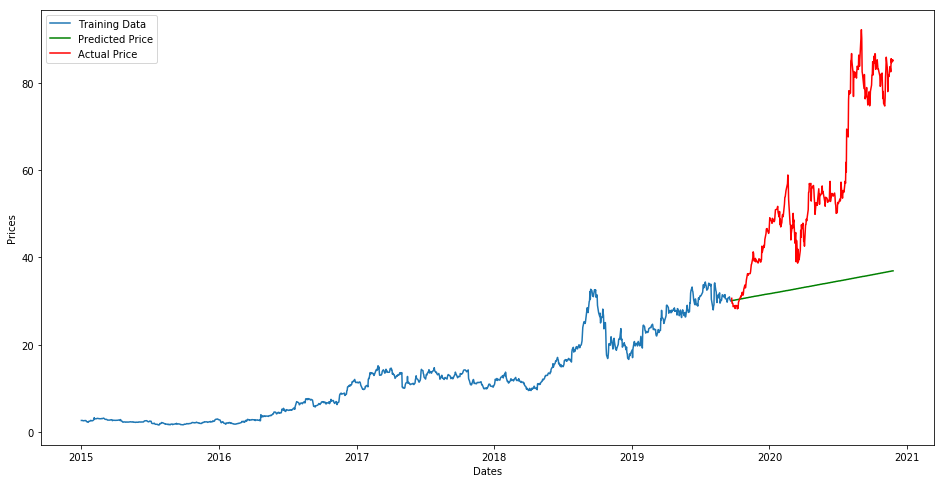

In [11]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Training Data')
#plt.plot(df['Close'], label='Training Data')
#print(test_data.index)
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**Hyperparameters -> p,d,q = 1,2,1**

In [12]:
p,d,q = 1,2,1
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))

model = ARIMA(history, order=(p,d,q))
model_fit = model.fit(disp=0)
predictions,_,_ = model_fit.forecast(len(test_ar))

error1 = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error1)
error2 = mean_squared_error(test_ar, predictions,squared=False)
print('Root Mean Squared Error: %.3f' % error2)
error3 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error3)
error4 = mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error4)
results.append([(p,d,q),error1,error2,error3,error4])

<class 'list'>


C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 554.728
Root Mean Squared Error: 23.553
Symmetric mean absolute percentage error: 36.797
Mean absolute percentage error: 29.949


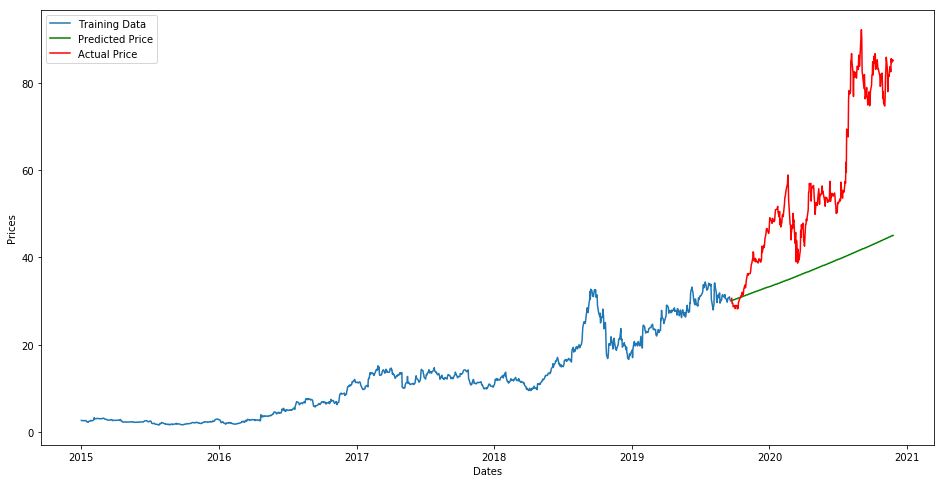

In [13]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Training Data')
#plt.plot(df['Close'], label='Training Data')
#print(test_data.index)
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**Hyperparameters -> p,d,q = 2,1,1**

In [14]:
p,d,q = 2,1,1
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))

model = ARIMA(history, order=(p,d,q))
model_fit = model.fit(disp=0)
predictions,_,_ = model_fit.forecast(len(test_ar))

error1 = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error1)
error2 = mean_squared_error(test_ar, predictions,squared=False)
print('Root Mean Squared Error: %.3f' % error2)
error3 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error3)
error4 = mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error4)
results.append([(p,d,q),error1,error2,error3,error4])

<class 'list'>
Testing Mean Squared Error: 777.403
Root Mean Squared Error: 27.882
Symmetric mean absolute percentage error: 46.216
Mean absolute percentage error: 36.003


C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


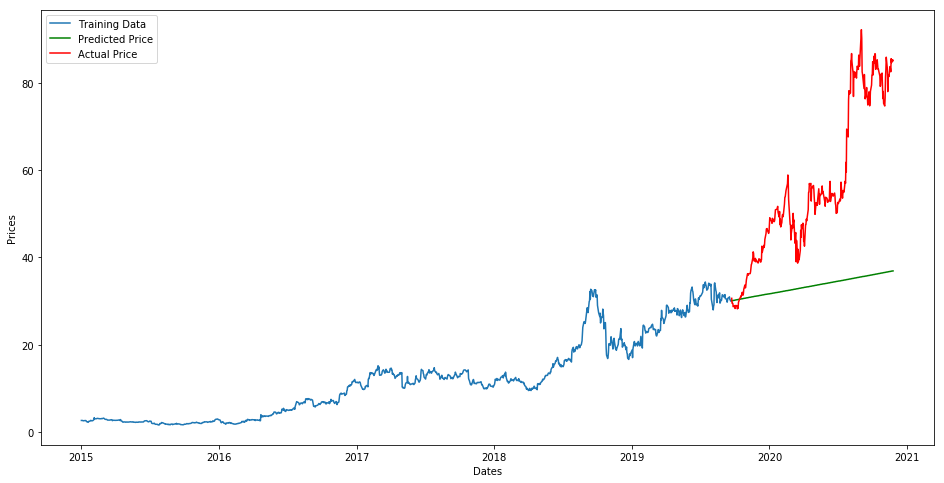

In [15]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Training Data')
#plt.plot(df['Close'], label='Training Data')
#print(test_data.index)
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**Hyperparameters -> p,d,q = 5,1,1**

In [16]:
p,d,q = 5,1,1
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))

model = ARIMA(history, order=(p,d,q))
model_fit = model.fit(disp=0)
predictions,_,_ = model_fit.forecast(len(test_ar))

error1 = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error1)
error2 = mean_squared_error(test_ar, predictions,squared=False)
print('Root Mean Squared Error: %.3f' % error2)
error3 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error3)
error4 = mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error4)
results.append([(p,d,q),error1,error2,error3,error4])

<class 'list'>


C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 770.546
Root Mean Squared Error: 27.759
Symmetric mean absolute percentage error: 45.858
Mean absolute percentage error: 35.770


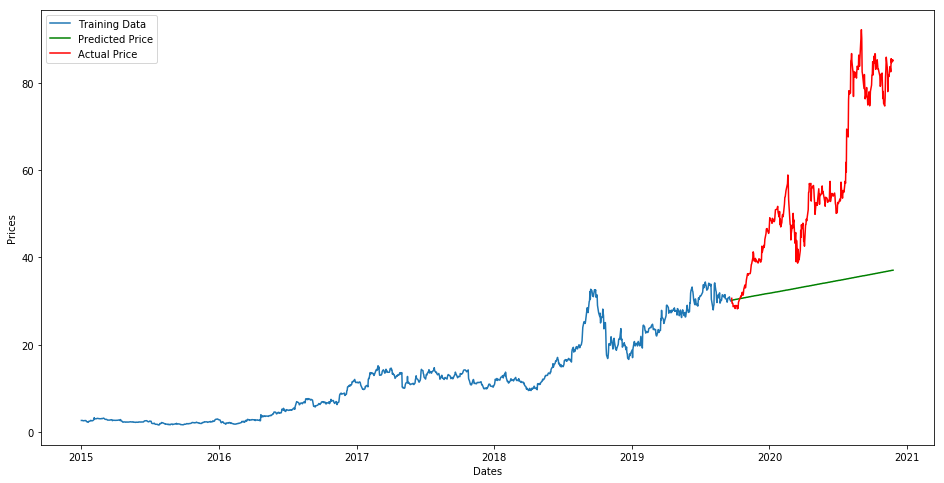

In [17]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Training Data')
#plt.plot(df['Close'], label='Training Data')
#print(test_data.index)
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**Hyperparameters -> p,d,q = 10,1,1**

In [18]:
p,d,q = 10,1,1
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))

model = ARIMA(history, order=(p,d,q))
model_fit = model.fit(disp=0)
predictions,_,_ = model_fit.forecast(len(test_ar))

error1 = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error1)
error2 = mean_squared_error(test_ar, predictions,squared=False)
print('Root Mean Squared Error: %.3f' % error2)
error3 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error3)
error4 = mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error4)
results.append([(p,d,q),error1,error2,error3,error4])

<class 'list'>


C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 769.627
Root Mean Squared Error: 27.742
Symmetric mean absolute percentage error: 45.809
Mean absolute percentage error: 35.738


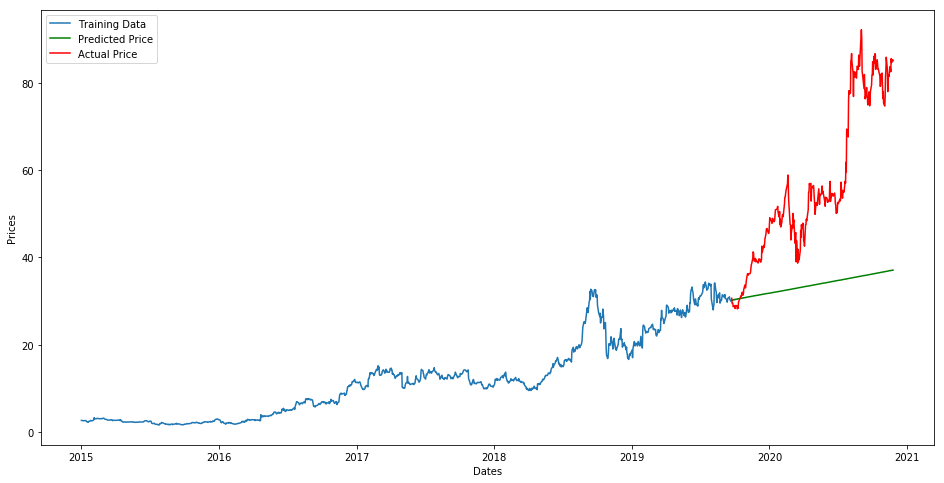

In [19]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Training Data')
#plt.plot(df['Close'], label='Training Data')
#print(test_data.index)
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**Hyperparameters -> p,d,q = 2,1,2**

In [20]:
p,d,q = 2,1,2
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))

model = ARIMA(history, order=(p,d,q))
model_fit = model.fit(disp=0)
predictions,_,_ = model_fit.forecast(len(test_ar))

error1 = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error1)
error2 = mean_squared_error(test_ar, predictions,squared=False)
print('Root Mean Squared Error: %.3f' % error2)
error3 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error3)
error4 = mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error4)
results.append([(p,d,q),error1,error2,error3,error4])

<class 'list'>


C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 776.266
Root Mean Squared Error: 27.862
Symmetric mean absolute percentage error: 46.156
Mean absolute percentage error: 35.965


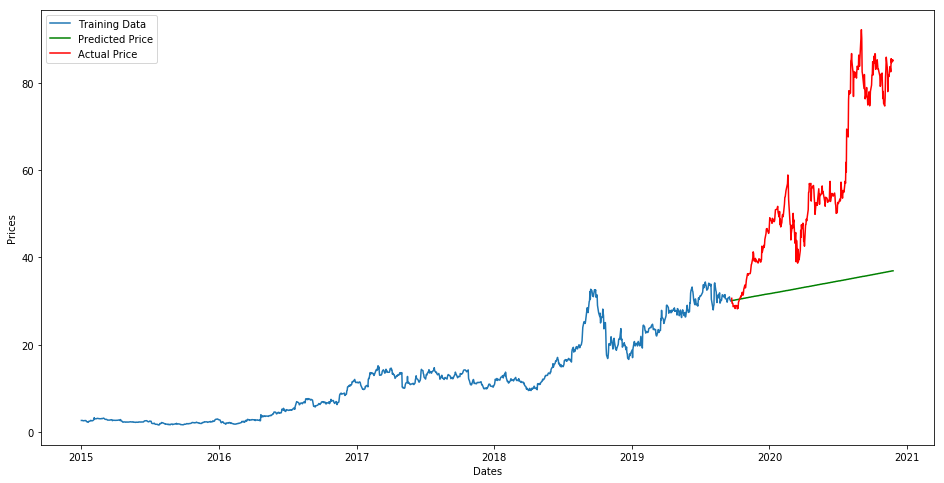

In [21]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Training Data')
#plt.plot(df['Close'], label='Training Data')
#print(test_data.index)
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**Hyperparameters -> p,d,q = 2,2,1**

In [22]:
p,d,q = 2,2,1
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))

model = ARIMA(history, order=(p,d,q))
model_fit = model.fit(disp=0)
predictions,_,_ = model_fit.forecast(len(test_ar))

error1 = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error1)
error2 = mean_squared_error(test_ar, predictions,squared=False)
print('Root Mean Squared Error: %.3f' % error2)
error3 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error3)
error4 = mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error4)
results.append([(p,d,q),error1,error2,error3,error4])

<class 'list'>


C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 556.535
Root Mean Squared Error: 23.591
Symmetric mean absolute percentage error: 36.891
Mean absolute percentage error: 30.013


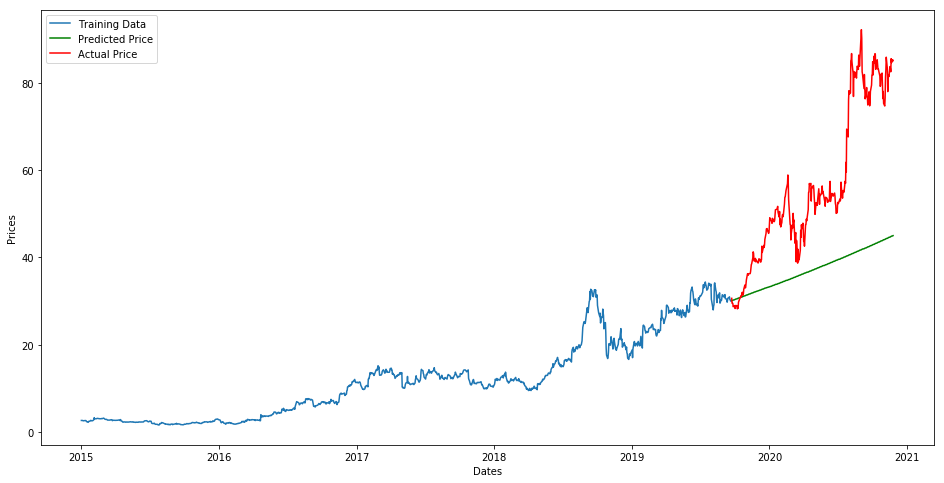

In [23]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Training Data')
#plt.plot(df['Close'], label='Training Data')
#print(test_data.index)
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**Hyperparameters -> p,d,q = 3,2,1**

In [24]:
p,d,q = 3,2,1
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))

model = ARIMA(history, order=(p,d,q))
model_fit = model.fit(disp=0)
predictions,_,_ = model_fit.forecast(len(test_ar))

error1 = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error1)
error2 = mean_squared_error(test_ar, predictions,squared=False)
print('Root Mean Squared Error: %.3f' % error2)
error3 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error3)
error4 = mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error4)
results.append([(p,d,q),error1,error2,error3,error4])

<class 'list'>


C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 549.039
Root Mean Squared Error: 23.432
Symmetric mean absolute percentage error: 36.497
Mean absolute percentage error: 29.741


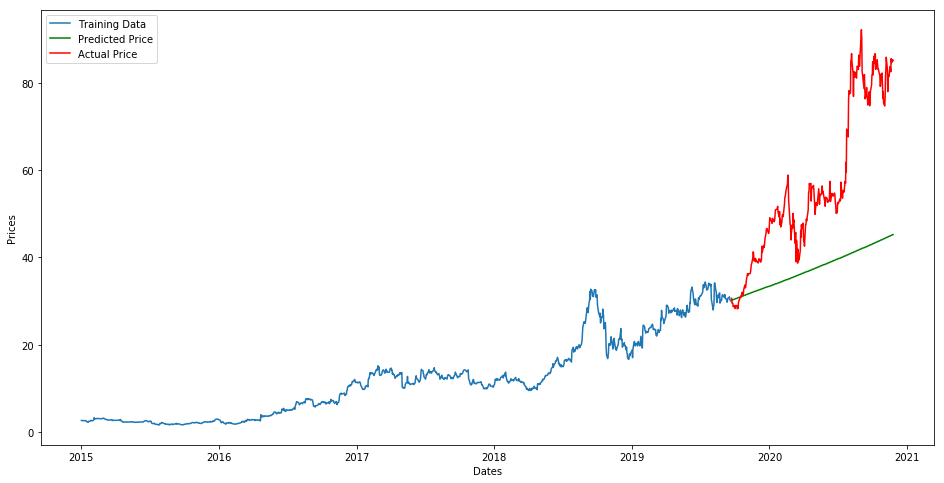

In [25]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Training Data')
#plt.plot(df['Close'], label='Training Data')
#print(test_data.index)
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**Hyperparameters -> p,d,q = 5,2,1**

In [26]:
p,d,q = 5,2,1
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))

model = ARIMA(history, order=(p,d,q))
model_fit = model.fit(disp=0)
predictions,_,_ = model_fit.forecast(len(test_ar))

error1 = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error1)
error2 = mean_squared_error(test_ar, predictions,squared=False)
print('Root Mean Squared Error: %.3f' % error2)
error3 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error3)
error4 = mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error4)
results.append([(p,d,q),error1,error2,error3,error4])

<class 'list'>


C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 547.884
Root Mean Squared Error: 23.407
Symmetric mean absolute percentage error: 36.436
Mean absolute percentage error: 29.699


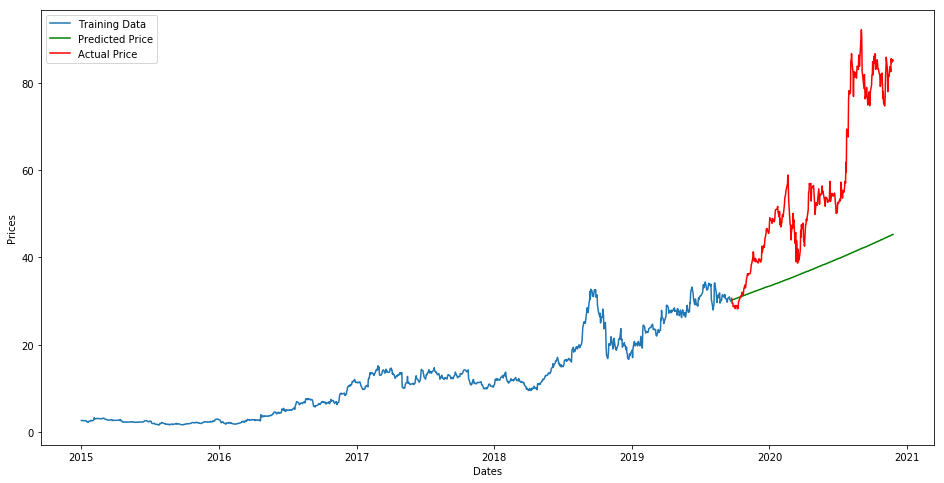

In [27]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Training Data')
#plt.plot(df['Close'], label='Training Data')
#print(test_data.index)
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**Hyperparameters -> p,d,q = 1,1,2**

In [28]:
p,d,q = 1,1,2
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))

model = ARIMA(history, order=(p,d,q))
model_fit = model.fit(disp=0)
predictions,_,_ = model_fit.forecast(len(test_ar))

error1 = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error1)
error2 = mean_squared_error(test_ar, predictions,squared=False)
print('Root Mean Squared Error: %.3f' % error2)
error3 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error3)
error4 = mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error4)
results.append([(p,d,q),error1,error2,error3,error4])

<class 'list'>
Testing Mean Squared Error: 777.247
Root Mean Squared Error: 27.879
Symmetric mean absolute percentage error: 46.207
Mean absolute percentage error: 35.998


C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


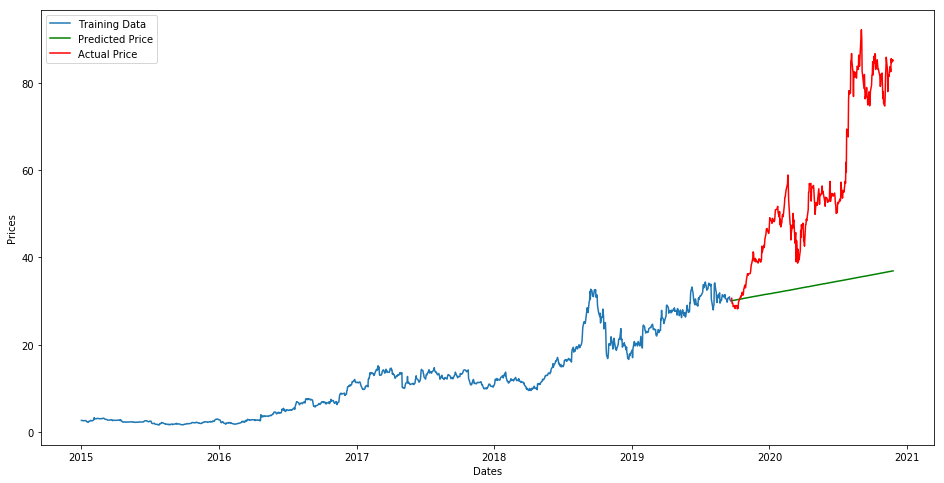

In [29]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Training Data')
#plt.plot(df['Close'], label='Training Data')
#print(test_data.index)
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**Hyperparameters -> p,d,q = 1,1,5**

In [30]:
p,d,q = 1,1,5
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))

model = ARIMA(history, order=(p,d,q))
model_fit = model.fit(disp=0)
predictions,_,_ = model_fit.forecast(len(test_ar))

error1 = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error1)
error2 = mean_squared_error(test_ar, predictions,squared=False)
print('Root Mean Squared Error: %.3f' % error2)
error3 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error3)
error4 = mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error4)
results.append([(p,d,q),error1,error2,error3,error4])

<class 'list'>


C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 770.374
Root Mean Squared Error: 27.756
Symmetric mean absolute percentage error: 45.849
Mean absolute percentage error: 35.764


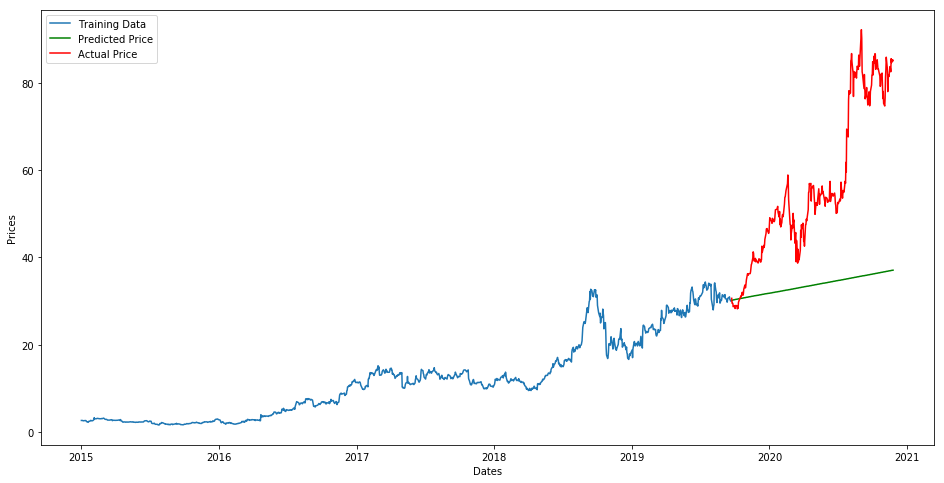

In [31]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Training Data')
#plt.plot(df['Close'], label='Training Data')
#print(test_data.index)
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**Hyperparameters -> p,d,q = 1,1,10**

In [32]:
p,d,q = 1,1,10
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))

model = ARIMA(history, order=(p,d,q))
model_fit = model.fit(disp=0)
predictions,_,_ = model_fit.forecast(len(test_ar))

error1 = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error1)
error2 = mean_squared_error(test_ar, predictions,squared=False)
print('Root Mean Squared Error: %.3f' % error2)
error3 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error3)
error4 = mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error4)
results.append([(p,d,q),error1,error2,error3,error4])

<class 'list'>


C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 785.436
Root Mean Squared Error: 28.026
Symmetric mean absolute percentage error: 46.641
Mean absolute percentage error: 36.283


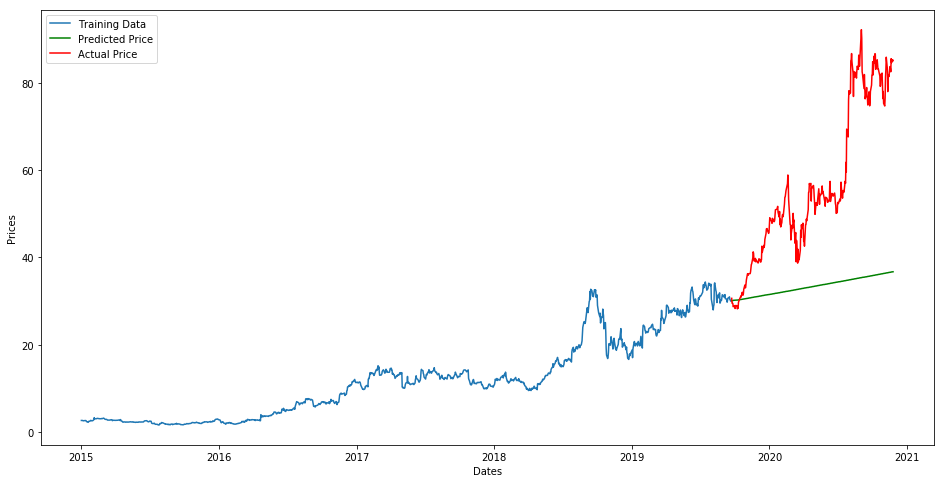

In [33]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Training Data')
#plt.plot(df['Close'], label='Training Data')
#print(test_data.index)
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**Hyperparameters -> p,d,q = 3,2,2**

In [34]:
p,d,q = 3,2,2
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))

model = ARIMA(history, order=(p,d,q))
model_fit = model.fit(disp=0)
predictions,_,_ = model_fit.forecast(len(test_ar))

error1 = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error1)
error2 = mean_squared_error(test_ar, predictions,squared=False)
print('Root Mean Squared Error: %.3f' % error2)
error3 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error3)
error4 = mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error4)
results.append([(p,d,q),error1,error2,error3,error4])

<class 'list'>


C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Testing Mean Squared Error: 549.211
Root Mean Squared Error: 23.435
Symmetric mean absolute percentage error: 36.506
Mean absolute percentage error: 29.748


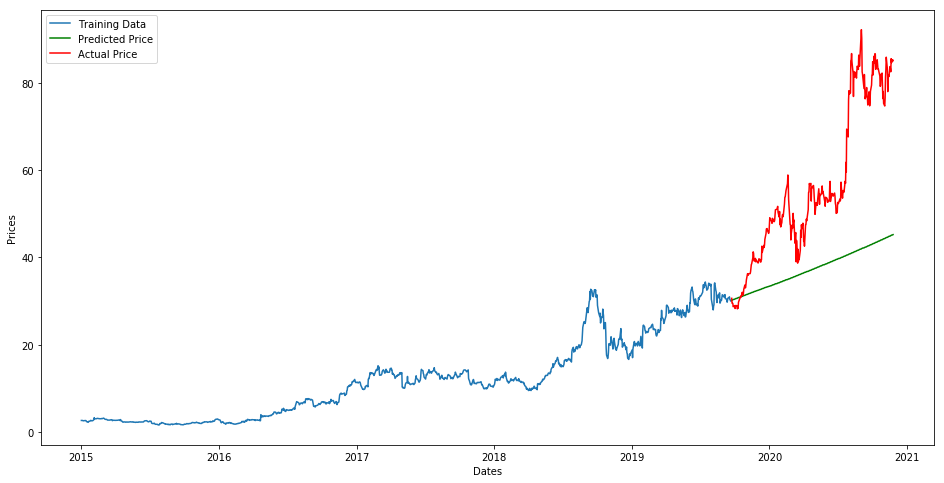

In [35]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Training Data')
#plt.plot(df['Close'], label='Training Data')
#print(test_data.index)
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**Hyperparameters -> p,d,q = 10,2,10**

In [36]:
p,d,q = 10,2,10
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))

model = ARIMA(history, order=(p,d,q))
model_fit = model.fit(disp=0)
predictions,_,_ = model_fit.forecast(len(test_ar))

error1 = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error1)
error2 = mean_squared_error(test_ar, predictions,squared=False)
print('Root Mean Squared Error: %.3f' % error2)
error3 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error3)
error4 = mean_absolute_percentage_error(test_ar, predictions)
print('Mean absolute percentage error: %.3f' % error4)
results.append([(p,d,q),error1,error2,error3,error4])

<class 'list'>


C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np

Testing Mean Squared Error: 544.042
Root Mean Squared Error: 23.325
Symmetric mean absolute percentage error: 36.225
Mean absolute percentage error: 29.552


C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\Pranav\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


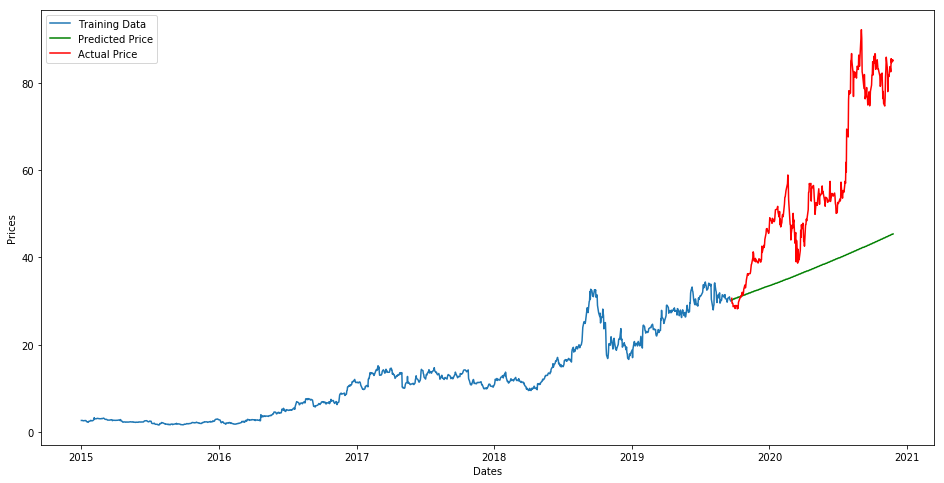

In [37]:
plt.figure(figsize=(16,8))
plt.plot(train_data['Close'], label='Training Data')
#plt.plot(df['Close'], label='Training Data')
#print(test_data.index)
plt.plot(test_data.index, predictions, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data['Close'], color='red', label='Actual Price')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

**Error rates for each experiment**

In [38]:
for tup in results:
    print(tup)

[(1, 1, 1), 776.6364107617536, 27.868197120763906, 46.17574183935564, 35.97743636681996]
[(1, 2, 1), 554.7281002686333, 23.552666521407577, 36.79674400612542, 29.9485513831897]
[(2, 1, 1), 777.403025912694, 27.881948029373664, 46.21561089630727, 36.00331277829851]
[(5, 1, 1), 770.5458255221225, 27.758707201923553, 45.857642113025754, 35.770234078242964]
[(10, 1, 1), 769.6269555743065, 27.74215124272641, 45.80884494486222, 35.73825270846119]
[(2, 1, 2), 776.2663508162977, 27.861556862750827, 46.15616365180742, 35.96463426547859]
[(2, 2, 1), 556.5349499723368, 23.590992984025423, 36.89053706683138, 30.013260126959157]
[(3, 2, 1), 549.0389731406844, 23.43158067951636, 36.4969929039569, 29.74136786067521]
[(5, 2, 1), 547.8839839481649, 23.406921710215652, 36.43588598169966, 29.69902622786467]
[(1, 1, 2), 777.246605942283, 27.87914284805548, 46.20741348995034, 35.997976363840536]
[(1, 1, 5), 770.3742645973596, 27.755616811689837, 45.84866150499123, 35.76434793996276]
[(1, 1, 10), 785.436257